In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

## 한국제외

In [13]:
datas = ['BR', 'CA', 'DE', 'FR', 'GB', 'IN', 'US']

dfs = []
for csv in datas:
    
    df = pd.read_csv(f'/Users/gihyunyeo/Documents/데이터사이언티스트/ML/ML_project/project_1/2020_youtube/{csv}_youtube_trending_data.csv', index_col='video_id')
    df['country'] = csv
    dfs.append(df)



except_KR_youtube_df = pd.concat(dfs)
except_KR_youtube_df.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR


In [14]:
# 영상제목과 채널명이 둘 다 중복인 영상 제거
except_KR_youtube_data = except_KR_youtube_df.drop_duplicates(['title','channelTitle'], keep='first')

except_KR_youtube_data.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR


In [15]:
except_KR_youtube = except_KR_youtube_data.dropna(how='any',axis=0)

In [16]:
tag_df = except_KR_youtube.sample(frac=0.25)

In [19]:
except_kr_words_tag = ' '.join((job for job in tag_df.tags.dropna().str.replace(';', ' ').str.replace(',', ' ').str.replace('None', ' ').str.replace('[', ' ').str.replace(']', ' ')))

/var/folders/1v/l58j125s3l3_f2vgrjx8n4000000gn/T/ipykernel_43594/24513566.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  except_kr_words_tag = ' '.join((job for job in tag_df.tags.dropna().str.replace(';', ' ').str.replace(',', ' ').str.replace('None', ' ').str.replace('[', ' ').str.replace(']', ' ')))


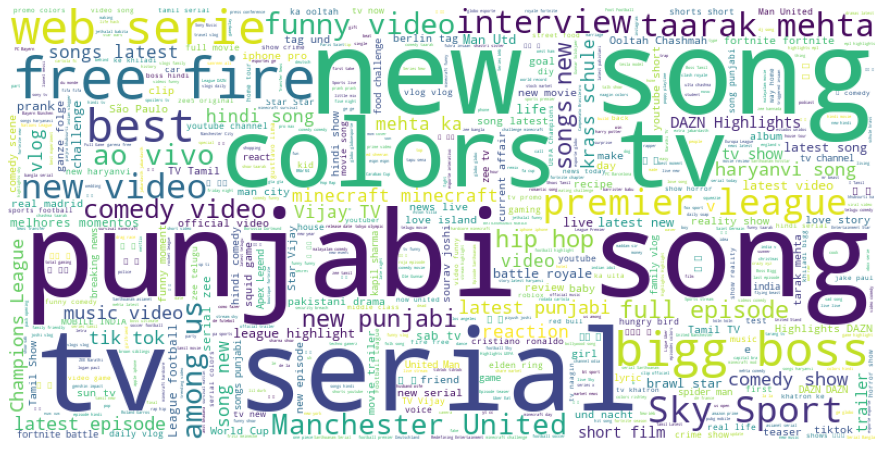

In [20]:
wc_tag = WordCloud( width=800, height=400,max_words=1000, background_color='white').generate(except_kr_words_tag)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc_tag);

## 한국만

In [24]:
datas = ['KR']

dfs = []
for csv in datas:
    
    df = pd.read_csv(f'/Users/gihyunyeo/Documents/데이터사이언티스트/ML/ML_project/project_1/2020_youtube/{csv}_youtube_trending_data.csv', index_col='video_id')
    df['country'] = csv
    dfs.append(df)



KR_youtube_df = pd.concat(dfs)
KR_youtube_df.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,KR
I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",KR
9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,KR


In [25]:
# 영상제목과 채널명이 둘 다 중복인 영상 제거
KR_youtube_data = KR_youtube_df.drop_duplicates(['title','channelTitle'], keep='first')

KR_youtube_data.head(3)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,
uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,KR
I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",KR
9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,KR


In [27]:
KR_youtube = KR_youtube_data.dropna(how='any',axis=0)
tag_df = KR_youtube.sample(frac=0.25)

In [28]:
kr_words_tag = ' '.join((job for job in tag_df.tags.dropna().str.replace(';', ' ').str.replace(',', ' ').str.replace('None', ' ').str.replace('[', ' ').str.replace(']', ' ')))

/var/folders/1v/l58j125s3l3_f2vgrjx8n4000000gn/T/ipykernel_43594/1805049458.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  kr_words_tag = ' '.join((job for job in tag_df.tags.dropna().str.replace(';', ' ').str.replace(',', ' ').str.replace('None', ' ').str.replace('[', ' ').str.replace(']', ' ')))


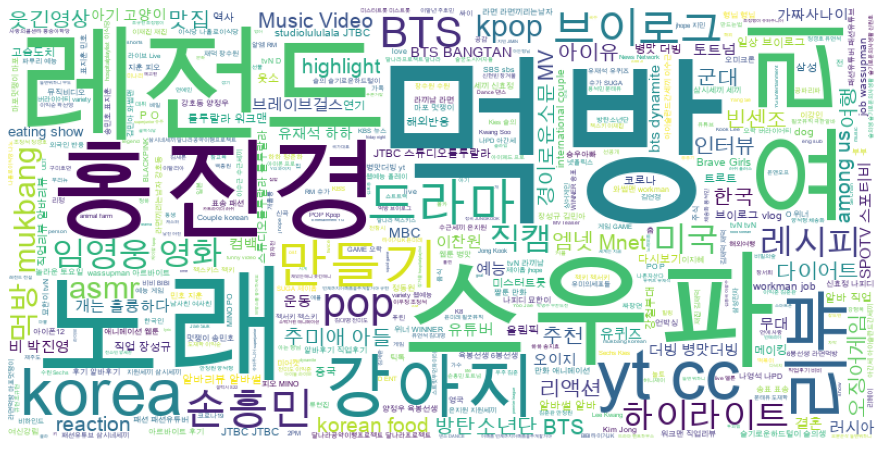

In [31]:
wc_tag = WordCloud(font_path='/Library/Fonts/Arial Unicode', width=800, height=400,max_words=1000, background_color='white').generate(kr_words_tag)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc_tag);